In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math
import time
import os
import sys
current_path = os.getcwd()
path_to_files = current_path + '/../sz_auxiliary_files/'



TCMB = 2.726 #Kelvin
TCMB_uK = 2.726e6 #micro-Kelvin


hplanck=6.626068e-34 #MKS
kboltz=1.3806503e-23 #MKS
clight=299792458.0 #MKS
m_elec = 510.999 #keV

# tsz function
def fsz(nu_ghz):
    nu = 1.e9*np.asarray(nu_ghz).astype(float)
    X = hplanck*nu/(kboltz*TCMB)
    resp = (X / np.tanh(X/2.0) - 4.0) * TCMB_uK #put explicitly into uK_CMB units,
    return resp
sys.path.append('/Users/boris/Work/CLASS-SZ/SO-SZ/rancat/rancat')
import cosmology as co

In [2]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]


In [9]:
common_settings = {
                   # LambdaCDM parameters
#                    'h':0.67556,
#                    'omega_b':0.022032,
#                    'omega_cdm':0.12038,
#                    'A_s':2.215e-9,
#                    'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
#                    'YHe':0.246,
                   'mass function' : 'T08', 
#                    'units for tSZ spectrum':'muK2'
}

# copied from : https://github.com/simonsobs/websky_model/blob/a93bbf758432a936c0ec2b59775683b695d3d191/websky_model/websky.py#L55
websky_Omega_M = 0.31
websky_Omega_B = 0.049
websky_Omega_L = 0.69
websky_h = 0.68
websky_sigma_8 = 0.81
websky_n_s = 0.965


websky_cosmo = {
    'omega_b': websky_Omega_B*websky_h**2.,
    'omega_cdm': (websky_Omega_M-websky_Omega_B)*websky_h**2.,
    'h': websky_h,
    'tau_reio': 0.0543,
    'sigma8': websky_sigma_8,
    'n_s': websky_n_s, 
    'use_websky_m200m_to_m200c_conversion': 1
}

M = Class()
M.set(common_settings)
M.set(websky_cosmo)
M.set({# class_sz parameters:
       'output':'tSZ_1h,tSZ_2h,dndlnM',
       'pressure profile': 'B12',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
       'ell_max' : 10000,
       'ell_min' : 2,
    'dell':150.,
       'z_min': z_min_websky,
       'z_max': z_max_websky,
       'M_min':Mmin_websky_msun*websky_h, # all masses in Msun/h
       'M_max':Mmax_websky_msun*websky_h,
       #'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'dimensionless',
        'n_ell_pressure_profile' : 70,
        'n_m_pressure_profile' : 300,
        'n_z_pressure_profile' : 500,
    'x_outSZ': 4.,
    'truncate_wrt_rvir':0,
    'hm_consistency':0,
    'pressure_profile_epsrel':1e-4,
    'pressure_profile_epsabs':1e-10
#     'N_redshift_dndlnM':500,
#     'N_mass_dndlnM':500
        })
        
M.compute()
cl_sz = M.cl_sz()
# M.struct_cleanup()
# M.empty()

(0.1, 1.3)

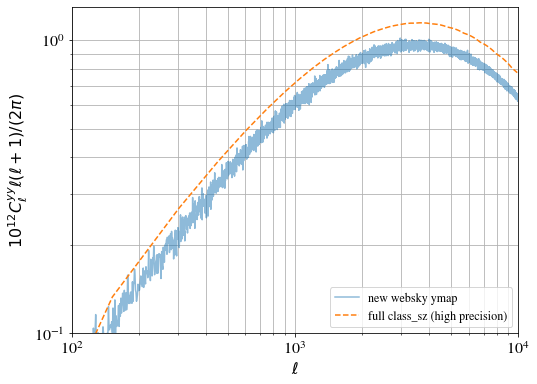

In [10]:
ls_ws, dls_ws =np.loadtxt(path_to_files+'cl_yy_websky_l_dl_061221.txt',unpack=True)
plt.plot(ls_ws,1.*dls_ws*1e12,label='new websky ymap',alpha=0.5)
# plt.plot(ls_ws,1.15*dls_ws*1e12,label='new websky ymap x 1.15',alpha=0.1)

# plt.loglog(ell,Dl,label='websky T08 + websky y(theta|M,z)',ls=':')
# plt.loglog(ell_with_hmf_from_class_sz,Dl_with_hmf_from_class_sz,label='class_sz T08 + websky y(theta|M,z)')
# plt.loglog(ell_with_hmf_from_class_sz_more_thetas,Dl_with_hmf_from_class_sz_more_thetas,label='websky T08 + websky y(theta|M,z)_more_thetas')


# plt.loglog(ell_with_hmf_and_y_from_class_sz,Dl_with_hmf_and_y_from_class_sz,label='class_sz T08 + class_sz y(theta|M,z)',ls='-.')


plt.loglog(cl_sz['ell'],np.asarray(cl_sz['1h'])+0.*np.asarray(cl_sz['2h']),label='full class_sz (high precision)',ls='--')



plt.gca().set_ylabel(r'$10^{12}C_{\ell}^{yy}\ell(\ell+1)/(2\pi)$')
plt.gca().set_xlabel(r'$\ell$')
plt.legend(loc=4,fontsize=12)
plt.grid(which='both')
plt.xlim(1e2,1e4)
plt.ylim(1e-1,1.3)
# plt.savefig('class_sz_websky_comp_wb_hmf.pdf')/

# Compare halo model power spectrum

z:  5.145332762080156 99
z:  4.4395350070320365 98
z:  3.8746576184657817 97
z:  3.414476711095814 96
z:  3.033828436391341 95
z:  2.714769390323205 94
z:  2.4442119989528517 93
z:  2.212419690601781 92
z:  2.0120213947902377 91
z:  1.837349647663245 90
z:  1.6839859733310465 89
z:  1.5484423189214553 88
z:  1.4279337780143326 87
z:  1.3202137872692021 86
z:  1.223452852693214 85
z:  1.1361481011100207 84
z:  1.0570549907916733 83
z:  0.9851351693726761 82
z:  0.9195162471322608 81
z:  0.8594604652549789 80
z:  0.8043400754460215 79
z:  0.7536178351007374 78
z:  0.7068314373806346 77
z:  0.663580991066343 76
z:  0.6235188896613908 75
z:  0.5863415600881777 74
z:  0.551782702015607 73
z:  0.5196077208264545 72
z:  0.4896091173953532 71
z:  0.4616026504441129 70
z:  0.4354241287913187 69
z:  0.41092671901264294 68
z:  0.3879786702050042 67
z:  0.3664613917976639 66
z:  0.3462678153374533 65
z:  0.32730099874139107 64
z:  0.30947292834962364 63
z:  0.2927034899930443 62
z:  0.276919581254

Text(0.5, 0, '$\\ell$')

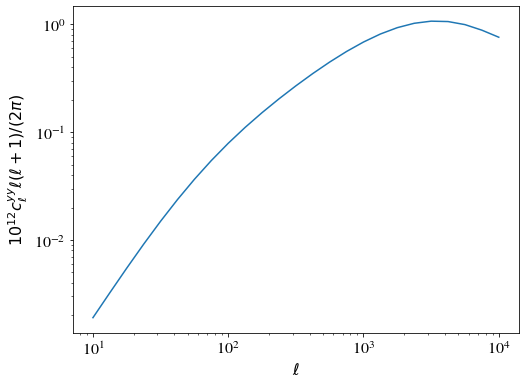

In [3]:
import numpy     as np
# import cosmology as co

#sys.path.insert(1, '/path/to/application/app/folder')

from scipy.interpolate import interp1d 
from scipy.special     import jv 

def m200m_to_m200c(m200m,z):
    omegamz = co.omegam*(1+z)**3/(co.omegam*(1+z)**3+1-co.omegam)
    m200c   = omegamz**0.35 * m200m # m200m to m200c conversion used for websky
    return m200c

def gettable(tablefile):

    tablefile=open(tablefile)
    
    n      = np.fromfile(tablefile,count=3,dtype=np.int32)
    bounds = np.fromfile(tablefile,count=6,dtype=np.float32)
    table  = np.fromfile(tablefile,count=n[0]*n[1]*n[2],dtype=np.float32)
    
    table  = np.resize(table,(n[0],n[1],n[2]))

    return n, bounds, table

n, bounds, table = gettable('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_ymap/class_vs_websky_yprofile/proftab_websky.bin')

nchit = n[0]
nmht  = n[1]
nrt   = n[2]

chimint = bounds[0]
chimaxt = bounds[1]
mhmint  = bounds[2]
mhmaxt  = bounds[3]
rmint   = bounds[4]
rmaxt   = bounds[5]

dchit = (np.log(chimaxt) - np.log(chimint)) / (nchit - 1)
drt   = (  np.log(rmaxt) -   np.log(rmint)) / (nrt - 1)
dmht  = ( np.log(mhmaxt) -  np.log(mhmint)) / (nmht - 1)

def y(theta_arcmin,mh,z):

    theta = 2 * np.pi * theta_arcmin / 60. / 360. # arcmin to rad
    chi = co.chiofz(z)
    r   = chi * np.tan(theta)
    if(r>=rmaxt or chi>=chimaxt): return 0.0

    if(   r <= rmint   ):   r =   rmint + 1e-5
    if( chi <= chimint ): chi = chimint + 1e-5
    if(  mh <= mhmint  ):  mh =  mhmint + 1e-5

    if(  mh >= mhmaxt  ):  mh =  mhmaxt - 1e-5

    ir   = int( (   np.log(r) -   np.log(rmint) ) / drt   )
    ichi = int( ( np.log(chi) - np.log(chimint) ) / dchit )
    imh  = int( (  np.log(mh) -  np.log(mhmint) ) / dmht  )

    fc = np.log(chi) - ( np.log(chimint) + (ichi ) * dchit )
    fm = np.log(mh)  - (  np.log(mhmint) + ( imh ) *  dmht )
    fr = np.log(r)   - (   np.log(rmint) + (  ir ) *   drt )

    fc /= dchit
    fm /= dmht
    fr /= drt

    if(fr<0): fr=0
    if(fr>1): fr=1
    if(fc<0): fc=0
    if(fc>1): fc=1
    if(fm<0): fm=0
    if(fm>1): fm=1
    y = (
         table[ichi,  imh,  ir  ] * (1-fr) * (1-fm) * (1-fc) +
         table[ichi,  imh,  ir+1] * (  fr) * (1-fm) * (1-fc) +
         table[ichi,  imh+1,ir  ] * (1-fr) * (  fm) * (1-fc) +
         table[ichi,  imh+1,ir+1] * (  fr) * (  fm) * (1-fc) +
         table[ichi+1,imh,  ir  ] * (1-fr) * (1-fm) * (  fc) +
         table[ichi+1,imh,  ir+1] * (  fr) * (1-fm) * (  fc) +
         table[ichi+1,imh+1,ir  ] * (1-fr) * (  fm) * (  fc) +
         table[ichi+1,imh+1,ir+1] * (  fr) * (  fm) * (  fc)
         )

    return y

def powerspectrum():

    # parameters of M-z integration 
    nchi   = 100   # enough to converge?
    nM     = 100   # enough to converge?
    chimin = 50.0
    chimax = 8e3
    Mmin   = 1.3e12 # approximately websky minimum M200m value
    Mmax   = 1e16
    dlnchi = (np.log(chimax) - np.log(chimin)) / (nchi-1)
    dlnM   = (np.log(  Mmax) - np.log(  Mmin)) / (nM-1)

    # angular power spectrum multipoles
    nell    = 25
    ellmin  = 10
    ellmax  = 1e4
    ellvals = np.logspace(np.log10(ellmin),np.log10(ellmax),nell)
    cls     = np.zeros(nell)
    
    # y-profile discretization 
    arcmin_per_rad = 60. * 360. / 2 / np.pi 
    ntheta1d = 50
    thetamin = 0.1 / arcmin_per_rad # enough to converge?
    ratio    = 1.1                  # ratio of successive theta values
    dlntheta = np.log(ratio)        # enough to converge?
        
    # create function dn/dM(M,z) with input M200m in Msun, and return units 
    # 1/Mpc^3/Msun; here we use Tinker et al. (2008) with Websky cosmology 
    # to use rancat.hmf_websky do:
    # 
    #   git clone https://github.com/marcelo-alvarez/rancat
    #   cd rancat
    #   pip install .
    # 
    # otherwise assign dndmofmz with a dn/dM(M,z) function using same arguments, 
    # units, and return value
    import rancat.hmf_websky as hmfw
    dndmofmz = hmfw.dndmofmz_tinker(Mmin/1.1,             Mmax*1.1,
                       co.zofchi(chimin)/1.1, co.zofchi(chimax)*1.1)
    
    # initialize 1d arrays
    chi1d    = np.exp(np.linspace(np.log(chimin),np.log(chimax),nchi))
    M1d      = np.exp(np.linspace(np.log(  Mmin),np.log(  Mmax),nM  ))

    for i in range(nchi-1,0,-1):      
        chi  = chi1d[i]
        z    = co.zofchi(chi); print('z: ',z,i)        
        chip = chi*np.exp(dlnchi/2.)
        chim = chi*np.exp(-dlnchi/2.)
        dV   = 4 * np.pi * (chip**3 - chim**3) / 3.

        for j in range(nM): 
            M         = M1d[j]
            M200c     = m200m_to_m200c(M,z)
            dndM      = dndmofmz(M,z)[0]
            n_per_str = dV * dndM * M * dlnM / (4.*np.pi)           
            
            ytilde = np.zeros(len(ellvals)) # Hankel transform of y-profile

            ntheta  = 0
            y1d     = np.zeros(0)
            theta1d = np.zeros(0)
            theta   = thetamin * arcmin_per_rad # rad to arcmin for y-profile function
            ycur    =  y(theta,M200c,z)
            while ycur>0: # fill y1d array until profile drops to zero (slow)
                y1d     = np.append(y1d,ycur)
                ntheta += 1
                theta1d = np.append(theta1d,theta)
                theta  *= np.exp(dlntheta)
                ycur    = y(theta,M200c,z)
            if ntheta > 0: 
                theta1d = theta1d / arcmin_per_rad # back to rad for Hankel transform
                for k in range(ntheta):
                    # Hankel transform of order 0
                    ytilde += (2 * np.pi * jv(0,ellvals*theta1d[k]) * 
                                   theta1d[k]**2 * y1d[k] * dlntheta)
            cls += ytilde**2 * n_per_str 
    
    return ellvals, cls*1e12/2/np.pi*ellvals*(ellvals+1)


ell, Dl = powerspectrum()

# import matplotlib.pyplot as plt
plt.loglog(ell,Dl,label='power spectrum using Tinker08 + websky y(theta|M,z')
plt.gca().set_ylabel(r'$10^{12}c_{\ell}^{yy}\ell(\ell+1)/(2\pi)$')
plt.gca().set_xlabel(r'$\ell$')
# plt.show()


In [5]:
# nchi   = 100   # enough to converge?
# nM     = 100   # enough to converge?
chimin = 50.0
chimax = 8e3
Mmin_websky_msun   = 1.3e12 # approximately websky minimum M200m value
Mmax_websky_msun   = 1e16

z_min_websky = co.zofchi(chimin)
z_max_websky = co.zofchi(chimax)

In [16]:
import rancat.hmf_websky as hmfw
dndmofmz = hmfw.dndmofmz_tinker(Mmin_websky_msun/1.1,Mmax_websky_msun*1.1,
                   co.zofchi(chimin)/1.1, co.zofchi(chimax)*1.1)
def get_dndM_class_sz(z,m):
    dndM_csz = (M.get_dndlnM_at_z_and_M(z,m*websky_h)/(m*websky_h))
    return dndM_csz*websky_h**4.
get_dndM_class_sz = np.vectorize(get_dndM_class_sz)





 creating table


In [20]:
mtest = 1e14
ztest = 0.13
dndM  = dndmofmz(mtest,ztest)[0]
dndM_csz = get_dndM_class_sz(ztest,mtest)
print('m:%.5e z:%.5e websky:%.5e class_sz:%.5e'%(mtest,ztest,dndM,dndM_csz))

m:1.00000e+14 z:1.30000e-01 websky:2.10957e-19 class_sz:2.14485e-19


In [18]:
mtest = 5e14
ztest = 0.43
dndM  = dndmofmz(mtest,ztest)[0]
dndM_csz = get_dndM_class_sz(ztest,mtest)
print('m:%.5e z:%.5e websky:%.5e class_sz:%.5e'%(mtest,ztest,dndM,dndM_csz))

m:5.00000e+14 z:4.30000e-01 websky:1.51061e-21 class_sz:1.54319e-21


In [22]:

def powerspectrum_with_hmf_from_class_sz():

    # parameters of M-z integration 
    nchi   = 100   # enough to converge?
    nM     = 100   # enough to converge?
    chimin = 50.0
    chimax = 8e3
    Mmin   = 1.3e12 # approximately websky minimum M200m value
    Mmax   = 1e16
    dlnchi = (np.log(chimax) - np.log(chimin)) / (nchi-1)
    dlnM   = (np.log(  Mmax) - np.log(  Mmin)) / (nM-1)

    # angular power spectrum multipoles
    nell    = 25
    ellmin  = 10
    ellmax  = 1e4
    ellvals = np.logspace(np.log10(ellmin),np.log10(ellmax),nell)
    cls     = np.zeros(nell)
    
    # y-profile discretization 
    arcmin_per_rad = 60. * 360. / 2 / np.pi 
    ntheta1d = 50
    thetamin = 0.1 / arcmin_per_rad # enough to converge?
    ratio    = 1.1                  # ratio of successive theta values
    dlntheta = np.log(ratio)        # enough to converge?
        
    # create function dn/dM(M,z) with input M200m in Msun, and return units 
    # 1/Mpc^3/Msun; here we use Tinker et al. (2008) with Websky cosmology 
    # to use rancat.hmf_websky do:
    # 
    #   git clone https://github.com/marcelo-alvarez/rancat
    #   cd rancat
    #   pip install .
    # 
    # otherwise assign dndmofmz with a dn/dM(M,z) function using same arguments, 
    # units, and return value
    import rancat.hmf_websky as hmfw
    dndmofmz = hmfw.dndmofmz_tinker(Mmin/1.1,             Mmax*1.1,
                       co.zofchi(chimin)/1.1, co.zofchi(chimax)*1.1)
    
    # initialize 1d arrays
    chi1d    = np.exp(np.linspace(np.log(chimin),np.log(chimax),nchi))
    M1d      = np.exp(np.linspace(np.log(  Mmin),np.log(  Mmax),nM  ))

    for i in range(nchi-1,0,-1):      
        chi  = chi1d[i]
        z    = co.zofchi(chi); print('z: ',z,i)        
        chip = chi*np.exp(dlnchi/2.)
        chim = chi*np.exp(-dlnchi/2.)
        dV   = 4 * np.pi * (chip**3 - chim**3) / 3.

        for j in range(nM): 
            M         = M1d[j]
            M200c     = m200m_to_m200c(M,z)
            #dndM      = dndmofmz(M,z)[0]
            dndM      = get_dndM_class_sz(z,M)
            n_per_str = dV * dndM * M * dlnM / (4.*np.pi)           
            
            ytilde = np.zeros(len(ellvals)) # Hankel transform of y-profile

            ntheta  = 0
            y1d     = np.zeros(0)
            theta1d = np.zeros(0)
            theta   = thetamin * arcmin_per_rad # rad to arcmin for y-profile function
            ycur    =  y(theta,M200c,z)
            while ycur>0: # fill y1d array until profile drops to zero (slow)
                y1d     = np.append(y1d,ycur)
                ntheta += 1
                theta1d = np.append(theta1d,theta)
                theta  *= np.exp(dlntheta)
                ycur    = y(theta,M200c,z)
            if ntheta > 0: 
                theta1d = theta1d / arcmin_per_rad # back to rad for Hankel transform
                for k in range(ntheta):
                    # Hankel transform of order 0
                    ytilde += (2 * np.pi * jv(0,ellvals*theta1d[k]) * 
                                   theta1d[k]**2 * y1d[k] * dlntheta)
            cls += ytilde**2 * n_per_str 
    
    return ellvals, cls*1e12/2/np.pi*ellvals*(ellvals+1)

ell_with_hmf_from_class_sz, Dl_with_hmf_from_class_sz = powerspectrum_with_hmf_from_class_sz()

z:  5.145332762080156 99
z:  4.4395350070320365 98
z:  3.8746576184657817 97
z:  3.414476711095814 96
z:  3.033828436391341 95
z:  2.714769390323205 94
z:  2.4442119989528517 93
z:  2.212419690601781 92
z:  2.0120213947902377 91
z:  1.837349647663245 90
z:  1.6839859733310465 89
z:  1.5484423189214553 88
z:  1.4279337780143326 87
z:  1.3202137872692021 86
z:  1.223452852693214 85
z:  1.1361481011100207 84
z:  1.0570549907916733 83
z:  0.9851351693726761 82
z:  0.9195162471322608 81
z:  0.8594604652549789 80
z:  0.8043400754460215 79
z:  0.7536178351007374 78
z:  0.7068314373806346 77
z:  0.663580991066343 76
z:  0.6235188896613908 75
z:  0.5863415600881777 74
z:  0.551782702015607 73
z:  0.5196077208264545 72
z:  0.4896091173953532 71
z:  0.4616026504441129 70
z:  0.4354241287913187 69
z:  0.41092671901264294 68
z:  0.3879786702050042 67
z:  0.3664613917976639 66
z:  0.3462678153374533 65
z:  0.32730099874139107 64
z:  0.30947292834962364 63
z:  0.2927034899930443 62
z:  0.276919581254

In [23]:
# range of integration of the reduced pressure profile:
x= np.logspace(-6,np.log10(5.),300)
m200c_pivot = 1e14*M.h() # [Msun/h]

def E(zp):
    return M.Hubble(zp)/M.Hubble(0.)
vec_get_dy_classy_battaglia = np.vectorize(M.get_1e6xdy_from_battaglia_pressure_at_x_z_and_m200c)

def y_over_Ez2_over_mfid_battaglia_at_m_and_z_theta(m_over_m_pivot_200c,thetap,z):

    m200c = m_over_m_pivot_200c*m200c_pivot
    theta_over_theta_200c = thetap
    #r200c = M.get_r_delta_of_m_delta_at_z(200,m200c,z)

    
    pp_battaglia = []
    #for xx in x:
        #pp_gnfw.append(M.get_1e6xdy_from_gnfw_pressure_at_x_z_and_m500c(np.sqrt(xx**2+theta_over_theta_500**2),z,m))
    pp_battaglia = vec_get_dy_classy_battaglia(np.sqrt(x**2+theta_over_theta_200c**2),z,m200c)
    # factor 2: s = 0 to smax instead of -smax to smax in the los integration
    xmax = 4.*np.sqrt(1.-(theta_over_theta_200c/4.)**2.)
    norm_battaglia = 2.*np.trapz(pp_battaglia[x<xmax], x=x[x<xmax])/E(z)**2*1e-6/m_over_m_pivot_200c
    return norm_battaglia
vec_y_battaglia = np.vectorize(y_over_Ez2_over_mfid_battaglia_at_m_and_z_theta)

def x200c_to_theta_arcmin(X):
    return M.get_rad_to_arcmin(r200c*X/M.get_dA(z))
def theta_arcmin_to_x200c(X):
    theta_rad = M.get_arcmin_to_rad(X)
    r = M.get_dA(z)*theta_rad
    return r/r200c

In [24]:
n_th = 80
th_array = np.geomspace(0.01,8.,n_th) # this theta/theta200c
M200m_test=5e14*M.h() # [Msun/h] 
z_test=0.1
M200c_test = M.get_m200m_to_m200c_at_z_and_M(z_test,M200m_test)
print('z=%.5e m200m=%.5e Msun m200c=%.5e Msun'%(z_test,M200m_test/M.h(),M200c_test/M.h()))

# dimensonfull radial array:
r200c = M.get_r_delta_of_m_delta_at_z(200,M200c_test,z_test)
theta200c_rad = r200c/M.get_dA(z_test)
theta200c_arcmin = M.get_rad_to_arcmin(theta200c_rad)


z=1.00000e-01 m200m=5.00000e+14 Msun m200c=3.54450e+14 Msun


In [25]:
r200c

0.9797262017534394

/var/folders/_q/j04c9lw93j75_c_z2jdfbtwm0000gn/T/ipykernel_16574/4242697316.py:21: RuntimeWarning: invalid value encountered in sqrt
  xmax = 4.*np.sqrt(1.-(theta_over_theta_200c/4.)**2.)


Text(0.5, 1.0, 'z=1.00000e-01 m200m=5.00000e+14 Msun m200c=3.54450e+14 Msun')

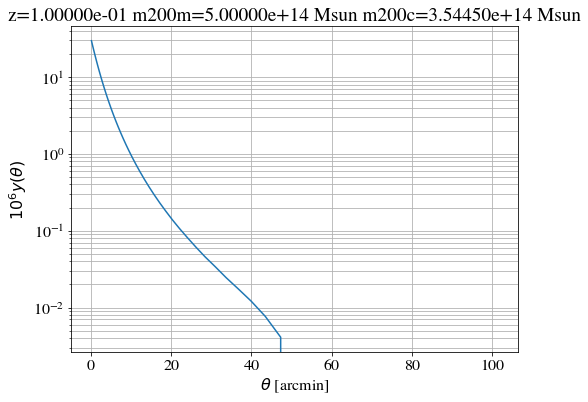

In [26]:
plt.plot(M.get_rad_to_arcmin(th_array*theta200c_rad),1e6*vec_y_battaglia(M200c_test/m200c_pivot,th_array,z_test)*E(z_test)**2*M200c_test/m200c_pivot)
plt.xlabel(r'$\theta$ [arcmin]')
plt.ylabel(r'$10^{6}y(\theta)$')
plt.grid(which='both')
plt.yscale('log')
plt.title('z=%.5e m200m=%.5e Msun m200c=%.5e Msun'%(z_test,M200m_test/M.h(),M200c_test/M.h()))

In [27]:
th_arcmin_to_print = M.get_rad_to_arcmin(th_array*theta200c_rad)
y_to_print = 1e6*vec_y_battaglia(M200c_test/m200c_pivot,th_array,z_test)*E(z_test)**2*M200c_test/m200c_pivot

/var/folders/_q/j04c9lw93j75_c_z2jdfbtwm0000gn/T/ipykernel_16574/4242697316.py:21: RuntimeWarning: invalid value encountered in sqrt
  xmax = 4.*np.sqrt(1.-(theta_over_theta_200c/4.)**2.)


In [28]:
y_to_print

array([2.97231041e+01, 2.95466968e+01, 2.93574343e+01, 2.91543701e+01,
       2.89365007e+01, 2.87027662e+01, 2.84520514e+01, 2.81831890e+01,
       2.78949636e+01, 2.75861180e+01, 2.72553612e+01, 2.69013797e+01,
       2.65228504e+01, 2.61184582e+01, 2.56869155e+01, 2.52269867e+01,
       2.47375159e+01, 2.42174592e+01, 2.36659209e+01, 2.30821933e+01,
       2.24658003e+01, 2.18165441e+01, 2.11345525e+01, 2.04203284e+01,
       1.96747964e+01, 1.88993473e+01, 1.80958761e+01, 1.72668122e+01,
       1.64151382e+01, 1.55443939e+01, 1.46586643e+01, 1.37625476e+01,
       1.28611023e+01, 1.19597724e+01, 1.10642908e+01, 1.01805626e+01,
       9.31453220e+00, 8.47203728e+00, 7.65865705e+00, 6.87956116e+00,
       6.13936703e+00, 5.44201341e+00, 4.79065735e+00, 4.18760051e+00,
       3.63424922e+00, 3.13111025e+00, 2.67782198e+00, 2.27321827e+00,
       1.91542023e+00, 1.60194926e+00, 1.32985398e+00, 1.09584298e+00,
       8.96415938e-01, 7.27986481e-01, 5.86991467e-01, 4.69460443e-01,
      

In [29]:
get_r_delta_of_m_delta_at_z = np.vectorize(M.get_r_delta_of_m_delta_at_z)
get_dA = np.vectorize(M.get_dA)

In [30]:
M200c = 3e14
arcmin_per_rad = 60. * 360. / 2 / np.pi 
theta = 0.1 / arcmin_per_rad
z = 0.34
r200c = get_r_delta_of_m_delta_at_z(200,M200c*websky_h,z)
theta200c_rad = r200c/get_dA(z)

vec_y_battaglia(M200c*websky_h/m200c_pivot,theta/theta200c_rad,z)*E(z)**2*M200c*websky_h/m200c_pivot

2.7492709083500413e-05

In [31]:
 y(theta*arcmin_per_rad,M200c,z)

2.665160154711903e-05

In [32]:


def powerspectrum_with_hmf_and_y_from_class_sz():

    # parameters of M-z integration 
    nchi   = 100   # enough to converge?
    nM     = 100   # enough to converge?
    chimin = 50.0
    chimax = 8e3
    Mmin   = 1.3e12 # approximately websky minimum M200m value
    Mmax   = 1e16
    dlnchi = (np.log(chimax) - np.log(chimin)) / (nchi-1)
    dlnM   = (np.log(  Mmax) - np.log(  Mmin)) / (nM-1)

    # angular power spectrum multipoles
    nell    = 25
    ellmin  = 10
    ellmax  = 1e4
    ellvals = np.logspace(np.log10(ellmin),np.log10(ellmax),nell)
    cls     = np.zeros(nell)
    
    # y-profile discretization 
    arcmin_per_rad = 60. * 360. / 2 / np.pi 
    ntheta1d = 50
    thetamin = 0.1 / arcmin_per_rad # enough to converge?
    ratio    = 1.1                  # ratio of successive theta values
    dlntheta = np.log(ratio)        # enough to converge?
        
    # create function dn/dM(M,z) with input M200m in Msun, and return units 
    # 1/Mpc^3/Msun; here we use Tinker et al. (2008) with Websky cosmology 
    # to use rancat.hmf_websky do:
    # 
    #   git clone https://github.com/marcelo-alvarez/rancat
    #   cd rancat
    #   pip install .
    # 
    # otherwise assign dndmofmz with a dn/dM(M,z) function using same arguments, 
    # units, and return value
    import rancat.hmf_websky as hmfw
    dndmofmz = hmfw.dndmofmz_tinker(Mmin/1.1,             Mmax*1.1,
                       co.zofchi(chimin)/1.1, co.zofchi(chimax)*1.1)
    
    # initialize 1d arrays
    chi1d    = np.exp(np.linspace(np.log(chimin),np.log(chimax),nchi))
    M1d      = np.exp(np.linspace(np.log(  Mmin),np.log(  Mmax),nM  ))

    for i in range(nchi-1,0,-1):      
        chi  = chi1d[i]
        z    = co.zofchi(chi); print('z: ',z,i)        
        chip = chi*np.exp(dlnchi/2.)
        chim = chi*np.exp(-dlnchi/2.)
        dV   = 4 * np.pi * (chip**3 - chim**3) / 3.

        for j in range(nM): 
            M         = M1d[j]
            M200c     = m200m_to_m200c(M,z)
            #dndM      = dndmofmz(M,z)[0]
            dndM      = get_dndM_class_sz(z,M)
            n_per_str = dV * dndM * M * dlnM / (4.*np.pi)           
            
            ytilde = np.zeros(len(ellvals)) # Hankel transform of y-profile

            ntheta  = 0
            y1d     = np.zeros(0)
            theta1d = np.zeros(0)
            theta   = thetamin * arcmin_per_rad # rad to arcmin for y-profile function
            #ycur    =  y(theta,M200c,z)
            r200c = get_r_delta_of_m_delta_at_z(200,M200c*websky_h,z)
            theta200c_rad = r200c/get_dA(z)
            ycur =  vec_y_battaglia(M200c*websky_h/m200c_pivot,theta/arcmin_per_rad/theta200c_rad,z)*E(z)**2*M200c*websky_h/m200c_pivot
            while ycur>0: # fill y1d array until profile drops to zero (slow)
                y1d     = np.append(y1d,ycur)
                ntheta += 1
                theta1d = np.append(theta1d,theta)
                theta  *= np.exp(dlntheta)
                #ycur    = y(theta,M200c,z)
                #r200c = get_r_delta_of_m_delta_at_z(200,M200c*websky_h,z)
                #theta200c_rad = r200c/M.get_dA(z)
                ycur =  vec_y_battaglia(M200c*websky_h/m200c_pivot,theta/arcmin_per_rad/theta200c_rad,z)*E(z)**2*M200c*websky_h/m200c_pivot


            if ntheta > 0: 
                theta1d = theta1d / arcmin_per_rad # back to rad for Hankel transform
                for k in range(ntheta):
                    # Hankel transform of order 0
                    ytilde += (2 * np.pi * jv(0,ellvals*theta1d[k]) * 
                                   theta1d[k]**2 * y1d[k] * dlntheta)
            cls += ytilde**2 * n_per_str 
    
    return ellvals, cls*1e12/2/np.pi*ellvals*(ellvals+1)

ell_with_hmf_and_y_from_class_sz, Dl_with_hmf_and_y_from_class_sz = powerspectrum_with_hmf_and_y_from_class_sz()

z:  5.145332762080156 99


/var/folders/_q/j04c9lw93j75_c_z2jdfbtwm0000gn/T/ipykernel_16574/4242697316.py:21: RuntimeWarning: invalid value encountered in sqrt
  xmax = 4.*np.sqrt(1.-(theta_over_theta_200c/4.)**2.)


z:  4.4395350070320365 98
z:  3.8746576184657817 97
z:  3.414476711095814 96
z:  3.033828436391341 95
z:  2.714769390323205 94
z:  2.4442119989528517 93
z:  2.212419690601781 92
z:  2.0120213947902377 91
z:  1.837349647663245 90
z:  1.6839859733310465 89
z:  1.5484423189214553 88
z:  1.4279337780143326 87
z:  1.3202137872692021 86
z:  1.223452852693214 85
z:  1.1361481011100207 84
z:  1.0570549907916733 83
z:  0.9851351693726761 82
z:  0.9195162471322608 81
z:  0.8594604652549789 80
z:  0.8043400754460215 79
z:  0.7536178351007374 78
z:  0.7068314373806346 77
z:  0.663580991066343 76
z:  0.6235188896613908 75
z:  0.5863415600881777 74
z:  0.551782702015607 73
z:  0.5196077208264545 72
z:  0.4896091173953532 71
z:  0.4616026504441129 70
z:  0.4354241287913187 69
z:  0.41092671901264294 68
z:  0.3879786702050042 67
z:  0.3664613917976639 66
z:  0.3462678153374533 65
z:  0.32730099874139107 64
z:  0.30947292834962364 63
z:  0.2927034899930443 62
z:  0.27691958125403787 61
z:  0.2620543429

In [33]:
Dl_with_hmf_and_y_from_class_sz

array([0.00200909, 0.003422  , 0.0057843 , 0.00963372, 0.01569974,
       0.02490502, 0.03833124, 0.05713187, 0.08248083, 0.11564663,
       0.15817594, 0.21205138, 0.27961469, 0.3631016 , 0.4637825 ,
       0.58079367, 0.70981013, 0.84195051, 0.96357263, 1.05748645,
       1.10612971, 1.09695132, 1.02753865, 0.91270498, 0.78515519])

In [46]:
def powerspectrum_with_hmf_from_class_sz_more_thetas():

    # parameters of M-z integration 
    nchi   = 100   # enough to converge?
    nM     = 100   # enough to converge?
    chimin = 50.0
    chimax = 8e3
    Mmin   = 1.3e12 # approximately websky minimum M200m value
    Mmax   = 1e16
    dlnchi = (np.log(chimax) - np.log(chimin)) / (nchi-1)
    dlnM   = (np.log(  Mmax) - np.log(  Mmin)) / (nM-1)

    # angular power spectrum multipoles
    nell    = 25
    ellmin  = 10
    ellmax  = 1e4
    ellvals = np.logspace(np.log10(ellmin),np.log10(ellmax),nell)
    cls     = np.zeros(nell)
    
    # y-profile discretization 
    arcmin_per_rad = 60. * 360. / 2 / np.pi 
    ntheta1d = 50
    thetamin = 0.01 / arcmin_per_rad # enough to converge?
    ratio    = 1.01                  # ratio of successive theta values
    dlntheta = np.log(ratio)        # enough to converge?
        
    # create function dn/dM(M,z) with input M200m in Msun, and return units 
    # 1/Mpc^3/Msun; here we use Tinker et al. (2008) with Websky cosmology 
    # to use rancat.hmf_websky do:
    # 
    #   git clone https://github.com/marcelo-alvarez/rancat
    #   cd rancat
    #   pip install .
    # 
    # otherwise assign dndmofmz with a dn/dM(M,z) function using same arguments, 
    # units, and return value
    import rancat.hmf_websky as hmfw
    dndmofmz = hmfw.dndmofmz_tinker(Mmin/1.1,             Mmax*1.1,
                       co.zofchi(chimin)/1.1, co.zofchi(chimax)*1.1)
    
    # initialize 1d arrays
    chi1d    = np.exp(np.linspace(np.log(chimin),np.log(chimax),nchi))
    M1d      = np.exp(np.linspace(np.log(  Mmin),np.log(  Mmax),nM  ))

    for i in range(nchi-1,0,-1):      
        chi  = chi1d[i]
        z    = co.zofchi(chi); print('z: ',z,i)        
        chip = chi*np.exp(dlnchi/2.)
        chim = chi*np.exp(-dlnchi/2.)
        dV   = 4 * np.pi * (chip**3 - chim**3) / 3.

        for j in range(nM): 
            M         = M1d[j]
            M200c     = m200m_to_m200c(M,z)
            dndM      = dndmofmz(M,z)[0]
            #dndM      = get_dndM_class_sz(z,M)
            n_per_str = dV * dndM * M * dlnM / (4.*np.pi)           
            
            ytilde = np.zeros(len(ellvals)) # Hankel transform of y-profile

            ntheta  = 0
            y1d     = np.zeros(0)
            theta1d = np.zeros(0)
            theta   = thetamin * arcmin_per_rad # rad to arcmin for y-profile function
            ycur    =  y(theta,M200c,z)
            while ycur>0: # fill y1d array until profile drops to zero (slow)
                y1d     = np.append(y1d,ycur)
                ntheta += 1
                theta1d = np.append(theta1d,theta)
                theta  *= np.exp(dlntheta)
                ycur    = y(theta,M200c,z)
            if ntheta > 0: 
                theta1d = theta1d / arcmin_per_rad # back to rad for Hankel transform
                for k in range(ntheta):
                    # Hankel transform of order 0
                    ytilde += (2 * np.pi * jv(0,ellvals*theta1d[k]) * 
                                   theta1d[k]**2 * y1d[k] * dlntheta)
            cls += ytilde**2 * n_per_str 
    
    return ellvals, cls*1e12/2/np.pi*ellvals*(ellvals+1)

ell_with_hmf_from_class_sz_more_thetas, Dl_with_hmf_from_class_sz_more_thetas = powerspectrum_with_hmf_from_class_sz_more_thetas()

z:  5.145332762080156 99
z:  4.4395350070320365 98
z:  3.8746576184657817 97
z:  3.414476711095814 96
z:  3.033828436391341 95
z:  2.714769390323205 94
z:  2.4442119989528517 93
z:  2.212419690601781 92
z:  2.0120213947902377 91
z:  1.837349647663245 90
z:  1.6839859733310465 89
z:  1.5484423189214553 88
z:  1.4279337780143326 87
z:  1.3202137872692021 86
z:  1.223452852693214 85
z:  1.1361481011100207 84
z:  1.0570549907916733 83
z:  0.9851351693726761 82
z:  0.9195162471322608 81
z:  0.8594604652549789 80
z:  0.8043400754460215 79
z:  0.7536178351007374 78
z:  0.7068314373806346 77
z:  0.663580991066343 76
z:  0.6235188896613908 75
z:  0.5863415600881777 74
z:  0.551782702015607 73
z:  0.5196077208264545 72
z:  0.4896091173953532 71
z:  0.4616026504441129 70
z:  0.4354241287913187 69
z:  0.41092671901264294 68
z:  0.3879786702050042 67
z:  0.3664613917976639 66
z:  0.3462678153374533 65
z:  0.32730099874139107 64
z:  0.30947292834962364 63
z:  0.2927034899930443 62
z:  0.276919581254

In [9]:
common_settings = {
                   # LambdaCDM parameters
#                    'h':0.67556,
#                    'omega_b':0.022032,
#                    'omega_cdm':0.12038,
#                    'A_s':2.215e-9,
#                    'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
#                    'YHe':0.246,
                   'mass function' : 'T08', 
#                    'units for tSZ spectrum':'muK2'
}

# copied from : https://github.com/simonsobs/websky_model/blob/a93bbf758432a936c0ec2b59775683b695d3d191/websky_model/websky.py#L55
websky_Omega_M = 0.31
websky_Omega_B = 0.049
websky_Omega_L = 0.69
websky_h = 0.68
websky_sigma_8 = 0.81
websky_n_s = 0.965


websky_cosmo = {
    'omega_b': websky_Omega_B*websky_h**2.,
    'omega_cdm': (websky_Omega_M-websky_Omega_B)*websky_h**2.,
    'h': websky_h,
    'tau_reio': 0.0543,
    'sigma8': websky_sigma_8,
    'n_s': websky_n_s, 
    'use_websky_m200m_to_m200c_conversion': 1
}

M = Class()
M.set(common_settings)
M.set(websky_cosmo)
M.set({# class_sz parameters:
       'output':'tSZ_1h,tSZ_2h,dndlnM',
       'pressure profile': 'B12',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
       'ell_max' : 10000,
       'ell_min' : 2,
    'dell':50.,
       'z_min': z_min_websky,
       'z_max': z_max_websky,
       'M_min':Mmin_websky_msun*websky_h, # all masses in Msun/h
       'M_max':Mmax_websky_msun*websky_h,
       #'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'dimensionless',
        'n_ell_pressure_profile' : 70,
        'n_m_pressure_profile' : 300,
        'n_z_pressure_profile' : 300,
    'x_outSZ': 4.,
    'truncate_wrt_rvir':0,
    'hm_consistency':0,
#     'N_redshift_dndlnM':500,
#     'N_mass_dndlnM':500
        })
        
M.compute()
cl_sz = M.cl_sz()
# M.struct_cleanup()
# M.empty()

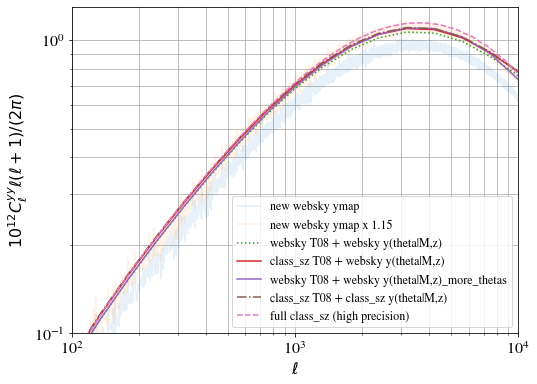

In [56]:
ls_ws, dls_ws =np.loadtxt(path_to_files+'cl_yy_websky_l_dl_061221.txt',unpack=True)
plt.plot(ls_ws,1.*dls_ws*1e12,label='new websky ymap',alpha=0.1)
plt.plot(ls_ws,1.15*dls_ws*1e12,label='new websky ymap x 1.15',alpha=0.1)

plt.loglog(ell,Dl,label='websky T08 + websky y(theta|M,z)',ls=':')
plt.loglog(ell_with_hmf_from_class_sz,Dl_with_hmf_from_class_sz,label='class_sz T08 + websky y(theta|M,z)')
plt.loglog(ell_with_hmf_from_class_sz_more_thetas,Dl_with_hmf_from_class_sz_more_thetas,label='websky T08 + websky y(theta|M,z)_more_thetas')


plt.loglog(ell_with_hmf_and_y_from_class_sz,Dl_with_hmf_and_y_from_class_sz,label='class_sz T08 + class_sz y(theta|M,z)',ls='-.')


plt.loglog(cl_sz['ell'],np.asarray(cl_sz['1h'])+0.*np.asarray(cl_sz['2h']),label='full class_sz (high precision)',ls='--')



plt.gca().set_ylabel(r'$10^{12}C_{\ell}^{yy}\ell(\ell+1)/(2\pi)$')
plt.gca().set_xlabel(r'$\ell$')
plt.legend(loc=4,fontsize=12)
plt.grid(which='both')
plt.xlim(1e2,1e4)
plt.ylim(1e-1,1.3)
plt.savefig('class_sz_websky_comp_wb_hmf.pdf')

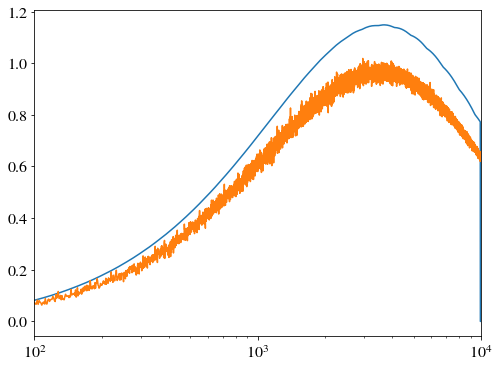

In [57]:
import scipy
csz_tot = scipy.interpolate.interp1d(cl_sz['ell'],np.asarray(cl_sz['1h']),fill_value=0.,bounds_error=False)
plt.plot(ls_ws,csz_tot(ls_ws))
plt.plot(ls_ws,dls_ws*1e12)
plt.xlim(1e2,1e4)
plt.xscale('log')

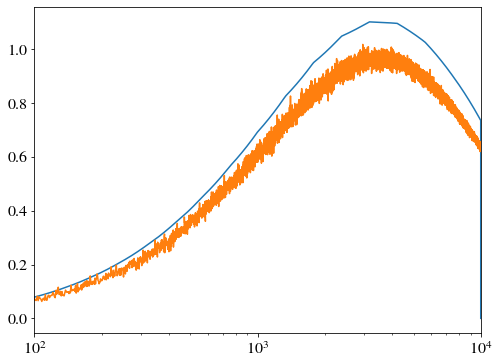

In [58]:
import scipy
# ell_with_hmf_from_class_sz_more_thetas,Dl_with_hmf_from_class_sz_more_thetas
csz_tot_wb = scipy.interpolate.interp1d(ell_with_hmf_from_class_sz_more_thetas,
                                     Dl_with_hmf_from_class_sz_more_thetas,fill_value=0.,bounds_error=False)
plt.plot(ls_ws,csz_tot_wb(ls_ws))
plt.plot(ls_ws,dls_ws*1e12)
plt.xlim(1e2,1e4)
plt.xscale('log')

/var/folders/_q/j04c9lw93j75_c_z2jdfbtwm0000gn/T/ipykernel_16574/1130942251.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ls_ws,csz_tot(ls_ws)/(dls_ws*1e12),label='full class_sz')
/var/folders/_q/j04c9lw93j75_c_z2jdfbtwm0000gn/T/ipykernel_16574/1130942251.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ls_ws,csz_tot_wb(ls_ws)/(dls_ws*1e12),label='with websky hmf',alpha=0.33)


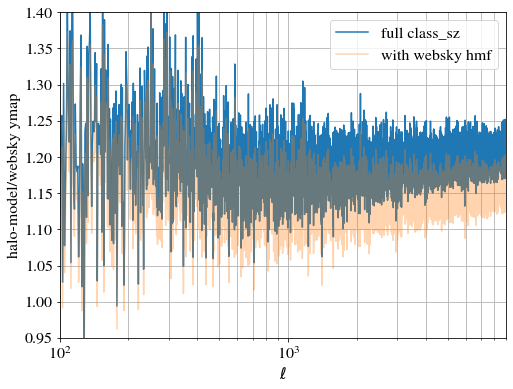

In [59]:

csz_tot = scipy.interpolate.interp1d(cl_sz['ell'],np.asarray(cl_sz['1h']),fill_value=0.,bounds_error=False)
plt.plot(ls_ws,csz_tot(ls_ws)/(dls_ws*1e12),label='full class_sz')
plt.plot(ls_ws,csz_tot_wb(ls_ws)/(dls_ws*1e12),label='with websky hmf',alpha=0.33)
# plt.plot(ls_ws,dls_ws*1e12)
plt.xlim(1e2,9e3)
plt.grid(which='both')
plt.xscale('log')
plt.ylim(0.95,1.4)
plt.xlabel(r'$\ell$')
plt.ylabel(r'halo-model/websky ymap')
plt.legend()
plt.savefig('ratio_hm_websky.pdf')

In [160]:
pkfile   = ('/Users/boris/Work/CLASS-SZ/SO-SZ/rancat/rancat/planck2018_powerspectrum.dat')
pk_data = np.loadtxt(pkfile)
k       = pk_data[:,0]
pk      = pk_data[:,1]*(2*np.pi)**3

In [164]:
get_pk = np.vectorize(M.pk)

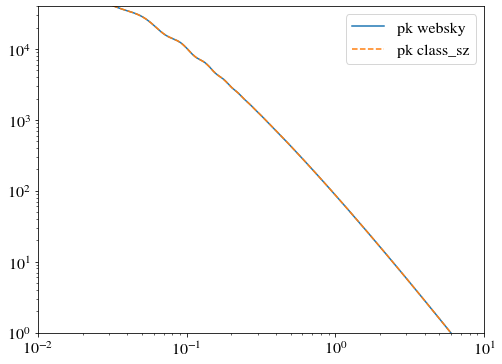

In [176]:
plt.loglog(k,pk,label='pk websky')
k_arr = np.geomspace(1e-2,1e1,100)
plt.loglog(k_arr,get_pk(k_arr,0.),ls='--',label='pk class_sz')
plt.xlim(1e-2,1e1)
plt.ylim(1,4e4)
plt.legend()

In [27]:
M.struct_cleanup()
M.empty()

# Compare profile in position space

minmax of table:  0.0 0.030134005
minmax of norm:   5.153309e-16 9.288055e-06
m200c websky: 3.54455e+14


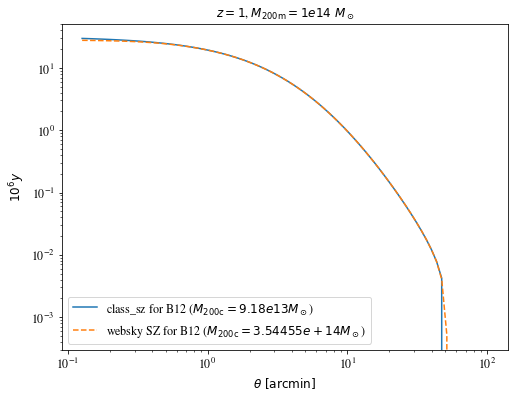

<Figure size 576x432 with 0 Axes>

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/boris/Work/CLASS-SZ/SO-SZ/rancat/rancat')
#sys.path.insert(1, '/path/to/application/app/folder')
import cosmology as co


def gettable(tablefile):
    tablefile=open(tablefile)
    n=np.fromfile(tablefile,count=3,dtype=np.int32)
    bounds=np.fromfile(tablefile,count=6,dtype=np.float32)
    table=np.fromfile(tablefile,count=n[0]*n[1]*n[2],dtype=np.float32)
    extra=np.fromfile(tablefile,count=2*n[0]*n[1]*n[2],dtype=np.float32)
    norm=np.fromfile(tablefile,count=n[0]*n[1],dtype=np.float32)
    print('minmax of table: ',table.min(),table.max())
    print('minmax of norm:  ',norm.min(), norm.max())
    table = np.resize(table,(n[0],n[1],n[2]))
    return n, bounds, table


n, bounds, table = gettable('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_ymap/class_vs_websky_yprofile/proftab_websky.bin')
nchit = n[0]
nmht  = n[1]
nrt   = n[2]
chimint = bounds[0]
chimaxt = bounds[1]
mhmint  = bounds[2]
mhmaxt  = bounds[3]
rmint   = bounds[4]
rmaxt   = bounds[5]
dchit = (np.log(chimaxt) - np.log(chimint)) / (nchit - 1)
drt   = (  np.log(rmaxt) -   np.log(rmint)) / (nrt - 1)
dmht  = ( np.log(mhmaxt) -  np.log(mhmint)) / (nmht - 1)



def m200m_to_m200c(m200m,z):
    omegamz = co.omegam*(1+z)**3/(co.omegam*(1+z)**3+1-co.omegam)
    m200c   = omegamz**0.35 * m200m # m200m to m200c conversion used for websky
    return m200c
def y(theta_arcmin,mh,z):
    theta = 2 * np.pi * theta_arcmin / 60. / 360. # arcmin to rad
    chi = co.chiofz(z)
    r   = chi * np.tan(theta)
    if(r>=rmaxt or chi>=chimaxt): return 0.0
    if(   r <= rmint   ):   r =   rmint + 1e-5
    if( chi <= chimint ): chi = chimint + 1e-5
    if(  mh <= mhmint  ):  mh =  mhmint + 1e-5
    if(  mh >= mhmaxt  ):  mh =  mhmaxt - 1e-5
    ir   = int( (   np.log(r) -   np.log(rmint) ) / drt   )
    ichi = int( ( np.log(chi) - np.log(chimint) ) / dchit )
    imh  = int( (  np.log(mh) -  np.log(mhmint) ) / dmht  )
    fc = np.log(chi) - ( np.log(chimint) + (ichi ) * dchit )
    fm = np.log(mh)  - (  np.log(mhmint) + ( imh ) *  dmht )
    fr = np.log(r)   - (   np.log(rmint) + (  ir ) *   drt )
    fc /= dchit
    fm /= dmht
    fr /= drt
    if(fr<0): fr=0
    if(fr>1): fr=1
    if(fc<0): fc=0
    if(fc>1): fc=1
    if(fm<0): fm=0
    if(fm>1): fm=1
    y = (
         table[ichi,  imh,  ir  ] * (1-fr) * (1-fm) * (1-fc) +
         table[ichi,  imh,  ir+1] * (  fr) * (1-fm) * (1-fc) +
         table[ichi,  imh+1,ir  ] * (1-fr) * (  fm) * (1-fc) +
         table[ichi,  imh+1,ir+1] * (  fr) * (  fm) * (1-fc) +
         table[ichi+1,imh,  ir  ] * (1-fr) * (1-fm) * (  fc) +
         table[ichi+1,imh,  ir+1] * (  fr) * (1-fm) * (  fc) +
         table[ichi+1,imh+1,ir  ] * (1-fr) * (  fm) * (  fc) +
         table[ichi+1,imh+1,ir+1] * (  fr) * (  fm) * (  fc)
         )
    return 1e6*y



theta_class, y_class = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_ymap/class_vs_websky_yprofile/for_marcelo_B12_thetaarcmin_1e6y_z1_m200m1e14_webskycosmo_t04r200c.txt',usecols=(0,1),unpack=True)
theta_wb = theta_class#np.linspace(0.1,2.,100)
y_websky = np.zeros(len(theta_wb ))

z=0.1
m200m=5e14 # Msun
m200c=m200m_to_m200c(m200m,z) # Msun
print('m200c websky: %.5e'%m200c)

i=0
for theta in theta_wb:
    y_websky[i] = y(theta,m200c,z)
#     print('th=%.5e y=%.5e\n'%(theta,y_websky[i]))
    i += 1
    # try:
    #     y_websky[i] = y(theta,z,m200c)
    #     print('th=%.5e y=%.5e\n'%(theta,y_websky[i]))
    #     i += 1
    # except ValueError:
    #     y_websky[i] = 0.
    #     i+=1

plt.clf()
plt.loglog(theta_class,y_class,label=r'class_sz for B12 ($M_{\rm 200c}=9.18e13 M_\odot$)')
plt.loglog(theta_wb,y_websky,ls='--',label=r'websky SZ for B12 ($M_{\rm 200c}=%.5e M_\odot$)'%m200c)
fs=12
plt.legend(fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.gca().set_ylabel(r'$10^6y$',fontsize=fs)
plt.gca().set_xlabel(r'$\theta\ [{\rm arcmin}]$',fontsize=fs)
plt.gca().set_title(r'$z=1$, $M_{\rm 200m}=1e14\ M_\odot$',fontsize=fs)
plt.show(block=True)
plt.savefig('class_v_websky_compton-y.png',bbox_inches='tight')

In [22]:
import healpy as hp

In [26]:
# this map is available here: https://mocks.cita.utoronto.ca/data/websky/v0.0/
tsz_map  =hp.read_map('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_ymap/tsz_8192.fits')

/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 8192
  warnings.warn("NSIDE = {0:d}".format(nside))
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:426: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning:

In [27]:
alpms = hp.map2alm(tsz_map)

In [35]:
cls_ws = hp.sphtfunc.alm2cl(alpms)

In [19]:
cls_ws_anafast = hp.anafast(tsz_map,iter=0)

NameError: name 'tsz_map' is not defined

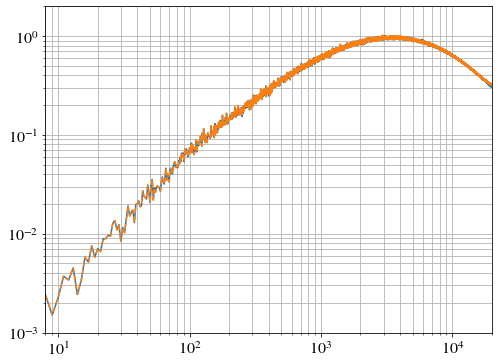

In [71]:
ls_ws = np.arange(0,len(cls_ws))
plt.plot(ls_ws,ls_ws*(ls_ws+1.)/2./np.pi*cls_ws*1e12)
plt.plot(ls_ws,ls_ws*(ls_ws+1.)/2./np.pi*cls_ws_anafast*1e12,label='anafast',ls='--')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3,2.)
plt.xlim(8.,2.e4)
plt.grid(which='both')

In [61]:
common_settings = {
                   # LambdaCDM parameters
#                    'h':0.67556,
#                    'omega_b':0.022032,
#                    'omega_cdm':0.12038,
#                    'A_s':2.215e-9,
#                    'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
#                    'YHe':0.246,
                   'mass function' : 'T08', 
#                    'units for tSZ spectrum':'muK2'
}

# copied from : https://github.com/simonsobs/websky_model/blob/a93bbf758432a936c0ec2b59775683b695d3d191/websky_model/websky.py#L55
websky_Omega_M = 0.31
websky_Omega_B = 0.049
websky_Omega_L = 0.69
websky_h = 0.68
websky_sigma_8 = 0.81
websky_n_s = 0.965


websky_cosmo = {
    'omega_b': websky_Omega_B*websky_h**2.,
    'omega_cdm': (websky_Omega_M-websky_Omega_B)*websky_h**2.,
    'h': websky_h,
    'tau_reio': 0.0543,
    'sigma8': websky_sigma_8,
    'n_s': websky_n_s, 
    'use_websky_m200m_to_m200c_conversion': 1
}

M = Class()
M.set(common_settings)
M.set(websky_cosmo)
M.set({# class_sz parameters:
       'output':'tSZ_1h,tSZ_2h',
       'pressure profile': 'B12',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-8,
       'z_max': 4.,
       'M_min':1e12, # all masses in Msun/h
       'M_max':5e15,
       #'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'dimensionless',
        'n_ell_pressure_profile' : 70,
        'n_m_pressure_profile' : 70,
        'n_z_pressure_profile' : 300,
    'x_outSZ': 4.,
    'truncate_wrt_rvir':0,
    'hm_consistency':0
        })
        
M.compute()
cl_sz = M.cl_sz()
M.struct_cleanup()
M.empty()

In [62]:
M = Class()
M.set(common_settings)
M.set(websky_cosmo)
M.set({# class_sz parameters:
       'output':'tSZ_1h,tSZ_2h',
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-8,
       'z_max': 4.,
       'M_min':1e12, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.2, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'dimensionless',
        'n_ell_pressure_profile' : 70,
        'n_m_pressure_profile' : 70,
        'n_z_pressure_profile' : 300,
    'x_outSZ': 1.,
    'truncate_wrt_rvir':0,
    'hm_consistency':0
        })
        
M.compute()
cl_sz_a10 = M.cl_sz()
M.struct_cleanup()
M.empty()

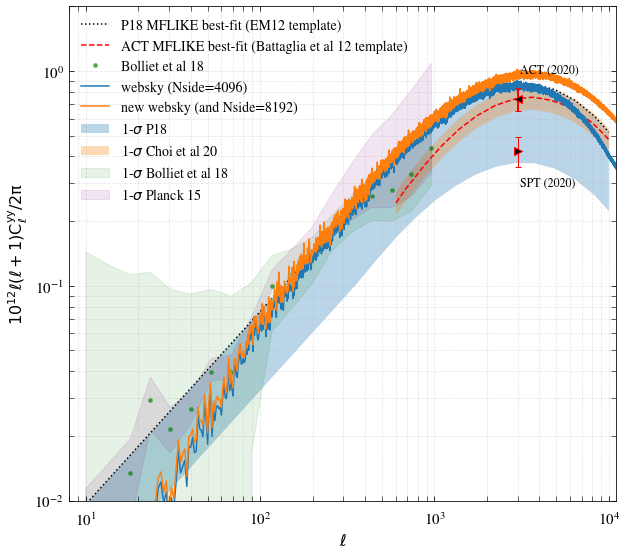

In [65]:
label_size = 15
title_size = 16
legend_size = 16
handle_length = 2
y_min = 1.e-2
y_max = 2

fig, ax1 = plt.subplots(1,1,figsize=(9,8))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$',size=title_size)

ax.set_ylabel(r'$10^{12}\ell(\ell+1)\mathrm{C^{yy}_\ell/2\pi}$',size=title_size)


PSZ = np.loadtxt(path_to_files+'tsz_143_eps0.50.dat')
B12 = np.loadtxt(path_to_files+'cl_tsz_150_bat.dat')

pow_planck = interp1d(PSZ[:,0],PSZ[:,1])
tsz_planck = PSZ[:,1]
tsz_planck = 1e12*tsz_planck/fsz(143)/fsz(143)/pow_planck(3000)
A_sz_planck_mean = 5.
A_sz_planck_sigma = 2.
A_sz_planck_best_fit = 7.

plt.plot(PSZ[:,0],A_sz_planck_best_fit*tsz_planck,label='P18 MFLIKE best-fit (EM12 template)',c='k',ls=':')
plt.fill_between(PSZ[:,0],(A_sz_planck_mean-A_sz_planck_sigma)*tsz_planck,(A_sz_planck_mean+A_sz_planck_sigma)*tsz_planck,alpha=0.3,label = r'1-$\sigma$ P18')


tsz_B12 = B12[:,1]
pow_b12 = interp1d(B12[:,0],tsz_B12)
tsz_B12 = 1e12*tsz_B12/pow_b12(3000)/fsz(148)/fsz(148)
# tsz_B12 = 1e12*tsz_B12/pow_b12(3000)/(2.67e6)**2
pow_tsz_b12 = interp1d(B12[:,0],tsz_B12)
A_sz_act_mean = 5.29
A_sz_act_sigma = 0.66
A_sz_act_best_fit = 5.29
# A_sz_act_best_fit = 1.

plt.plot(B12[:,0][600:],A_sz_act_best_fit*tsz_B12[600:],label='ACT MFLIKE best-fit (Battaglia et al 12 template)',c='r',ls='--')
plt.fill_between(B12[:,0][600:],(A_sz_act_mean-A_sz_act_sigma)*tsz_B12[600:],(A_sz_act_mean+A_sz_act_sigma)*tsz_B12[600:],alpha=0.3,label = r'1-$\sigma$ Choi et al 20')


ACTCellnew = 5.29/(2.67)**2
ACTCellnewerr =	0.66/(2.67)**2

SPTCellnew = 3.42/(2.84)**2
SPTCellnewerr = 0.54/(2.84)**2

ax.errorbar([3000],[SPTCellnew],
            yerr=[SPTCellnewerr],capthick=1,capsize=3,elinewidth=1,\
             fmt='>',mfc='k',markersize=8,color = 'r')

ax.errorbar([3000],[ACTCellnew],
            yerr=[ACTCellnewerr],capthick=1,capsize=3,elinewidth=2,\
             fmt='<',mfc='k',markersize=8,color = 'r',zorder=100)
ax.text(3.1e3, 3.e-1, 'SPT (2020)', fontsize=12,rotation = 0,
verticalalignment='center',horizontalalignment='left')
ax.text(3.1e3, 1.01e0, 'ACT (2020)', fontsize=12,rotation = 0,
verticalalignment='center',horizontalalignment='left')



P = np.loadtxt(path_to_files+'planck_sz_1712_00788v1.txt')
# ax.errorbar(P[:,0][0:18],P[:,1][0:18],yerr = P[:,2][0:18],color='green',linestyle="None",alpha = .5,label = 'B18',marker='o',markersize=3,capsize=5,elinewidth=2,markeredgewidth=2)
ax.plot(P[:,0][0:18],P[:,1][0:18],color='green',linestyle="None",alpha = .5,label = 'Bolliet et al 18',marker='o',markersize=3,markeredgewidth=2)
ax.fill_between(P[:,0][0:18],P[:,1][0:18]-P[:,2][0:18],P[:,1][0:18]+P[:,2][0:18],
color='green',alpha=0.1,label=r'1-$\sigma$ Bolliet et al 18')

P = np.loadtxt(path_to_files+'Planck2015.txt')
# ax.errorbar(P[:,0][0:18],P[:,1][0:18],yerr = P[:,4][0:18],color='purple',linestyle="None",alpha = .2,label = 'P15',marker='o',markersize=3,capsize=5,elinewidth=2,markeredgewidth=2)
# ax.plot(P[:,0][0:18],P[:,1][0:18],color='purple',linestyle="None",alpha = .2,label = 'P15',marker='o',markersize=3,markeredgewidth=2)
ax.fill_between(P[:,0][0:18],P[:,1][0:18]-P[:,4][0:18],P[:,1][0:18]+P[:,4][0:18],
color='purple',alpha=0.1,label=r'1-$\sigma$ Planck 15')

#plt.loglog(np.asarray(cl_sz['ell']),np.asarray(cl_sz['1h']),'k-.',label=r'class_sz 1-halo')
#plt.loglog(np.asarray(cl_sz['ell']),np.asarray(cl_sz['2h']),'b-.',label=r'class_sz 2-halo')
# plt.loglog(np.asarray(cl_sz['ell']),(np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h']))/1.,c='r',lw=2,label=r'class_sz 1+2-halo B12')

# plt.loglog(np.asarray(cl_sz_a10['ell']),(np.asarray(cl_sz_a10['1h'])+np.asarray(cl_sz_a10['2h']))/1.,c='orange',lw=2,label=r'class_sz 1+2-halo A10')


ls_ws, dls_ws =np.loadtxt(path_to_files+'cl_yy_websky_l_dl.txt',unpack=True)
plt.plot(ls_ws,dls_ws*1e12,label='websky (Nside=4096)')

ls_ws, dls_ws =np.loadtxt(path_to_files+'cl_yy_websky_l_dl_061221.txt',unpack=True)
plt.plot(ls_ws,1.*dls_ws*1e12,label='new websky (and Nside=8192)')



ax.set_ylim(y_min,y_max)
ax.legend(loc=2,ncol=1,fontsize=14,frameon=False)
    
plt.xlim(8,1.1e4)
fig.tight_layout()

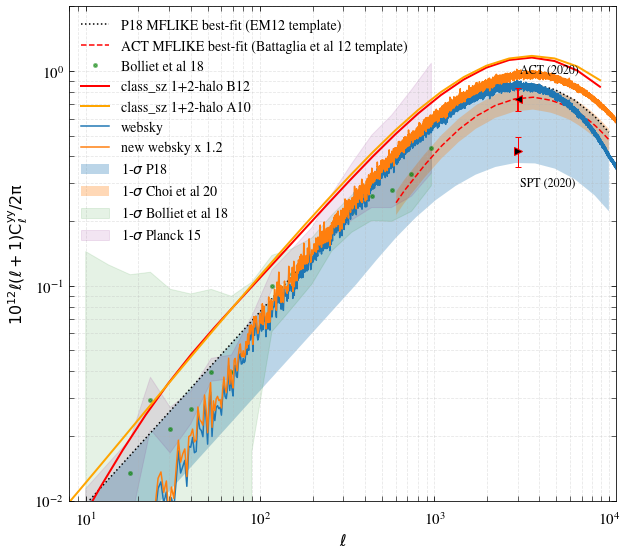

In [25]:
label_size = 15
title_size = 16
legend_size = 16
handle_length = 2
y_min = 1.e-2
y_max = 2

fig, ax1 = plt.subplots(1,1,figsize=(9,8))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$',size=title_size)

ax.set_ylabel(r'$10^{12}\ell(\ell+1)\mathrm{C^{yy}_\ell/2\pi}$',size=title_size)


PSZ = np.loadtxt(path_to_files+'tsz_143_eps0.50.dat')
B12 = np.loadtxt(path_to_files+'cl_tsz_150_bat.dat')

pow_planck = interp1d(PSZ[:,0],PSZ[:,1])
tsz_planck = PSZ[:,1]
tsz_planck = 1e12*tsz_planck/fsz(143)/fsz(143)/pow_planck(3000)
A_sz_planck_mean = 5.
A_sz_planck_sigma = 2.
A_sz_planck_best_fit = 7.

plt.plot(PSZ[:,0],A_sz_planck_best_fit*tsz_planck,label='P18 MFLIKE best-fit (EM12 template)',c='k',ls=':')
plt.fill_between(PSZ[:,0],(A_sz_planck_mean-A_sz_planck_sigma)*tsz_planck,(A_sz_planck_mean+A_sz_planck_sigma)*tsz_planck,alpha=0.3,label = r'1-$\sigma$ P18')


tsz_B12 = B12[:,1]
pow_b12 = interp1d(B12[:,0],tsz_B12)
tsz_B12 = 1e12*tsz_B12/pow_b12(3000)/fsz(148)/fsz(148)
# tsz_B12 = 1e12*tsz_B12/pow_b12(3000)/(2.67e6)**2
pow_tsz_b12 = interp1d(B12[:,0],tsz_B12)
A_sz_act_mean = 5.29
A_sz_act_sigma = 0.66
A_sz_act_best_fit = 5.29
# A_sz_act_best_fit = 1.

plt.plot(B12[:,0][600:],A_sz_act_best_fit*tsz_B12[600:],label='ACT MFLIKE best-fit (Battaglia et al 12 template)',c='r',ls='--')
plt.fill_between(B12[:,0][600:],(A_sz_act_mean-A_sz_act_sigma)*tsz_B12[600:],(A_sz_act_mean+A_sz_act_sigma)*tsz_B12[600:],alpha=0.3,label = r'1-$\sigma$ Choi et al 20')


ACTCellnew = 5.29/(2.67)**2
ACTCellnewerr =	0.66/(2.67)**2

SPTCellnew = 3.42/(2.84)**2
SPTCellnewerr = 0.54/(2.84)**2

ax.errorbar([3000],[SPTCellnew],
            yerr=[SPTCellnewerr],capthick=1,capsize=3,elinewidth=1,\
             fmt='>',mfc='k',markersize=8,color = 'r')

ax.errorbar([3000],[ACTCellnew],
            yerr=[ACTCellnewerr],capthick=1,capsize=3,elinewidth=2,\
             fmt='<',mfc='k',markersize=8,color = 'r',zorder=100)
ax.text(3.1e3, 3.e-1, 'SPT (2020)', fontsize=12,rotation = 0,
verticalalignment='center',horizontalalignment='left')
ax.text(3.1e3, 1.01e0, 'ACT (2020)', fontsize=12,rotation = 0,
verticalalignment='center',horizontalalignment='left')



P = np.loadtxt(path_to_files+'planck_sz_1712_00788v1.txt')
# ax.errorbar(P[:,0][0:18],P[:,1][0:18],yerr = P[:,2][0:18],color='green',linestyle="None",alpha = .5,label = 'B18',marker='o',markersize=3,capsize=5,elinewidth=2,markeredgewidth=2)
ax.plot(P[:,0][0:18],P[:,1][0:18],color='green',linestyle="None",alpha = .5,label = 'Bolliet et al 18',marker='o',markersize=3,markeredgewidth=2)
ax.fill_between(P[:,0][0:18],P[:,1][0:18]-P[:,2][0:18],P[:,1][0:18]+P[:,2][0:18],
color='green',alpha=0.1,label=r'1-$\sigma$ Bolliet et al 18')

P = np.loadtxt(path_to_files+'Planck2015.txt')
# ax.errorbar(P[:,0][0:18],P[:,1][0:18],yerr = P[:,4][0:18],color='purple',linestyle="None",alpha = .2,label = 'P15',marker='o',markersize=3,capsize=5,elinewidth=2,markeredgewidth=2)
# ax.plot(P[:,0][0:18],P[:,1][0:18],color='purple',linestyle="None",alpha = .2,label = 'P15',marker='o',markersize=3,markeredgewidth=2)
ax.fill_between(P[:,0][0:18],P[:,1][0:18]-P[:,4][0:18],P[:,1][0:18]+P[:,4][0:18],
color='purple',alpha=0.1,label=r'1-$\sigma$ Planck 15')

#plt.loglog(np.asarray(cl_sz['ell']),np.asarray(cl_sz['1h']),'k-.',label=r'class_sz 1-halo')
#plt.loglog(np.asarray(cl_sz['ell']),np.asarray(cl_sz['2h']),'b-.',label=r'class_sz 2-halo')
plt.loglog(np.asarray(cl_sz['ell']),(np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h']))/1.,c='r',lw=2,label=r'class_sz 1+2-halo B12')

plt.loglog(np.asarray(cl_sz_a10['ell']),(np.asarray(cl_sz_a10['1h'])+np.asarray(cl_sz_a10['2h']))/1.,c='orange',lw=2,label=r'class_sz 1+2-halo A10')


ls_ws, dls_ws =np.loadtxt(path_to_files+'cl_yy_websky_l_dl.txt',unpack=True)
plt.plot(ls_ws,dls_ws*1e12,label='websky')

ls_ws, dls_ws =np.loadtxt(path_to_files+'cl_yy_websky_l_dl_061221.txt',unpack=True)
plt.plot(ls_ws,1.*dls_ws*1e12,label='new websky x 1.2')



ax.set_ylim(y_min,y_max)
ax.legend(loc=2,ncol=1,fontsize=14,frameon=False)
    
plt.xlim(8,1.1e4)
fig.tight_layout()

In [37]:
#np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_yy_websky_l_dl_061221.txt',np.c_[ls_ws,ls_ws*(ls_ws+1.)/2./np.pi*cls_ws])

In [7]:
import healpy as hp

omegab = websky_Omega_B
omegac = websky_Omega_M-websky_Omega_B
omegam = omegab + omegac
h      = websky_h
ns     = websky_n_s
sigma8 = websky_sigma_8

c = 3e5

H0 = 100*h
nz = 100000
z1 = 0.0
z2 = 6.0
za = np.linspace(z1,z2,nz)
dz = za[1]-za[0]

H      = lambda z: H0*np.sqrt(omegam*(1+z)**3+1-omegam)
dchidz = lambda z: c/H(z)

chia = np.cumsum(dchidz(za))*dz

zofchi = interp1d(chia,za)

# from   cosmology import *
def makeACTName(RADeg, decDeg, prefix = 'ACT-CL'):
    """Makes ACT cluster name from RADeg, decDeg
    
    """
    
    actName=prefix+" J"+makeRA(RADeg)+makeDec(decDeg)
    
    return actName

def makeRA(myRADeg):
    """Makes RA part of ACT names.
    
    """
    hours=(myRADeg/360)*24
    if hours<10:
        sHours="0"+str(hours)[0]
    else:
        sHours=str(hours)[:2]
    
    mins=float(str(hours)[str(hours).index("."):])*60
    if mins<10:
        sMins="0"+str(mins)[:3]
    else:
        sMins=str(mins)[:4]
        
    return (sHours+sMins)#[:-2] # Trims off .x as not used in ACT names
        
#------------------------------------------------------------------------------------------------------------
def makeDec(myDecDeg):
    """Makes dec part of ACT names
    
    """
    
    # Positive
    if myDecDeg>0:
        if myDecDeg<10:
            sDeg="0"+str(myDecDeg)[0]
        else:
            sDeg=str(myDecDeg)[:2]
    
        mins=float(str(myDecDeg)[str(myDecDeg).index("."):])*60
        if mins<10:
            sMins="0"+str(mins)[:1]
        else:
            sMins=str(mins)[:2]
        
        return "+"+sDeg+sMins
    else:
        if myDecDeg>-10:
            sDeg="-0"+str(myDecDeg)[1]
        else:
            sDeg=str(myDecDeg)[:3]
    
        mins=float(str(myDecDeg)[str(myDecDeg).index("."):])*60
        if mins<10:
            sMins="0"+str(mins)[:1]
        else:
            sMins=str(mins)[:2]
        
        return str(sDeg+sMins)

omegam = M.Omega_m()
h = M.h()
rho = 2.775e11*omegam*h**2 # Msun/Mpc^3
path_to_catalogue_websky = '/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/'
f=open(path_to_catalogue_websky+'halos.pksc')
N=np.fromfile(f,count=3,dtype=np.int32)[0]

# only take first five entries for testing (there are ~8e8 halos total...)
# comment the following line to read in all halos
# ordered by decreasing mass
N = 800000
# N = 862923142

catalog=np.fromfile(f,count=N*10,dtype=np.float32)
catalog=np.reshape(catalog,(N,10))

x  = catalog[:,0];  y = catalog[:,1];  z = catalog[:,2] # Mpc (comoving)
vx = catalog[:,3]; vy = catalog[:,4]; vz = catalog[:,5] # km/sec
R  = catalog[:,6] # Mpc

# convert to mass, comoving distance, radial velocity, redshfit, RA and DEc
M200m    = 4*np.pi/3.*rho*R**3        # this is M200m (mean density 200 times mean) in Msun
chi      = np.sqrt(x**2+y**2+z**2)    # Mpc
vrad     = (x*vx + y*vy + z*vz) / chi # km/sec
redshift = zofchi(chi)      

theta, phi  = hp.vec2ang(np.column_stack((x,y,z))) # in radians

decDeg=-1*(np.degrees(theta)-90) # Because HEALPix
RADeg=np.degrees(phi)


### e.g. project to a map, matching the websky orientations
#nside = 1024
#map   = np.zeros((hp.nside2npix(nside)))

#pix = hp.vec2pix(nside, x, y, z)
#pix = hp.ang2pix(nside, theta, phi) does the same

#weight = 1. #1 for number density, array of size(x) for arbitrary
#np.add.at(map, pix, weight)

In [8]:
M = Class()
M.set(websky_cosmo)
has_selfn = 0
snrcut = 6.
M.set({
          'non linear': 'halofit',
#           'output' :'sz_cluster_counts,m200m_to_m500c',
          'output' :'sz_cluster_counts, m200m_to_m500c,m200m_to_m200c',
          'mass function' : 'T08',
          #'integrate_wrt_m200m' : 1,
          'concentration parameter': 'D08',
          'has_selection_function' : has_selfn,
          'sky area in deg2': 41253.,
#     'sky area in deg2': 599.,
          'experiment' : 1, # simons observatory 1
          'y_m_relation' : 1,
          'signal-to-noise cut-off for survey cluster completeness' : snrcut,
#           'SO_skyfracs_file': "/sz_auxiliary_files/so_3freqs_120921_pass2_skyfracs.txt",
#           'SO_ylims_file': "/sz_auxiliary_files/so_3freqs_120921_pass2_ylims.txt",
#           'SO_thetas_file': "/sz_auxiliary_files/so_3freqs_120921_pass2_thetas.txt",

          'M_min' : 1.0e10,#*websky_h, # bounds in websky:8.06216e+13 2.35569e+15, in matt's file m200mUncorr in Msun/h:1.11329e+14 2.17657e+15, Upp: 9.70934e+13 2.17039e+15
          'M_max' : 2.35569e+15,
          'B': 1.,

          'N_ur': 2.0328,
          'N_ncdm': 1,
          'm_ncdm': 0.0,
          'T_ncdm': 0.71611,
          'input_verbose' : 0,
          'background_verbose': 0,
          'perturbations_verbose': 0,
          'sz_verbose'  : 0,

          'bin_z_min_cluster_counts' : 0.,
          'bin_z_max_cluster_counts' : 2.,
          'bin_dz_cluster_counts' : 0.1,
          'bin_dlog10_snr': 0.25,

          'dlny' : 0.01,
          'lnymin' : -13., # planck  -11.5 so -11
          'lnymax' : -3.,  # planck 10. so -5
          'dlnM_cluster_count_completeness_grid' : 0.005,


          'cluster_count_completeness_grid_z_cutoff_low' : 0.4,
          'cluster_count_completeness_grid_z_cutoff_mid' : 1.,

          'dz_cluster_count_completeness_grid_low_z' : 1e-3,
          'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
          'dz_cluster_count_completeness_grid_high_z' : 1e-1,



          'mass_epsrel_cluster_counts' : 1e-6,
          'mass_epsabs_cluster_counts' : 1e-40,

          'redshift_epsrel_cluster_counts' : 1e-4,
          'redshift_epsabs_cluster_counts' : 1e-40,
    #a=4.56036e-01 b=-3.869082e-02
          'A_ym': 4.35e-05,#4.35e-05,#4.68912e-05,#4.35e-05,#4.62e-05,#A_ym_websky,4.68912e-05 b=1.054969e+00
          'B_ym':0.08,#0.08,#5.496869e-02, #0.08, #B_ym_websky,
          'C_ym' : 0.,
          'sigmaM_ym' : 0.,
    

#           # # tabulation of mass function:
          'n_z_dndlnM' : 200,
          'n_m_dndlnM' : 200,
#           #
#           # # computation of mass function
#           # # (grid in mass and redshifts for sigma and dsigma)
          'ndim_masses' : 200,
          'ndim_redshifts' : 200,

#           # pk setup for computation of sigma and dsigma
    
          'k_per_decade_class_sz' : 40., #important parameter
          'k_min_for_pk_class_sz' : 1e-4,
          'k_max_for_pk_class_sz' : 10.,

          'P_k_max_h/Mpc' : 2e1
    
})
M.compute()
print(M.sigma8())
print(M.get_sigma8_at_z(0.0002))
# print(M.get_sigma8_at_z(0.0))

0.8100000957137263
0.8103065815754312


In [44]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

In [45]:
z = redshift
len(z)
z.min()
z.max()
# z_min = 1e-7
# z_max = 4.
# z_edges = np.linspace(z_min,z_max,10)
z_min = min(z_edges)
z_max = max(z_edges)
print(z_min,z_max)
z_edges = np.asarray(z_edges)
z_center = (z_edges[:-1] + z_edges[1:])/2.
z_center

1.0000000000003062e-05 2.0


array([0.050005, 0.15    , 0.25    , 0.35    , 0.45    , 0.55    ,
       0.65    , 0.75    , 0.85    , 0.95    , 1.05    , 1.15    ,
       1.25    , 1.35    , 1.45    , 1.55    , 1.65    , 1.75    ,
       1.85    , 1.95    ])

In [46]:
m200_min = M200m.min()*h
m200_max = M200m.max()*h
print('%.5e'%m200_min,'%.5e'%m200_max)
m_edges = np.linspace(np.log(m200_min),np.log(m200_max),50)
m_center = (m_edges[:-1] + m_edges[1:])/2.
m_center

8.06216e+13 2.35569e+15


array([32.05522466, 32.12409863, 32.19297259, 32.26184656, 32.33072052,
       32.39959449, 32.46846846, 32.53734242, 32.60621639, 32.67509035,
       32.74396432, 32.81283829, 32.88171225, 32.95058622, 33.01946019,
       33.08833415, 33.15720812, 33.22608208, 33.29495605, 33.36383002,
       33.43270398, 33.50157795, 33.57045191, 33.63932588, 33.70819985,
       33.77707381, 33.84594778, 33.91482174, 33.98369571, 34.05256968,
       34.12144364, 34.19031761, 34.25919158, 34.32806554, 34.39693951,
       34.46581347, 34.53468744, 34.60356141, 34.67243537, 34.74130934,
       34.8101833 , 34.87905727, 34.94793124, 35.0168052 , 35.08567917,
       35.15455314, 35.2234271 , 35.29230107, 35.36117503])

In [47]:
nms = 1000
nzs = 2000
lnms = np.linspace(np.log(m200_min*1.000001),np.log(m200_max*0.99999),nms)
zs = np.linspace(z_min,z_max,nzs)

# masses in rows
# redshifts in column
# sum over rows -> axis 0 (1st dimension)
# sum over columns -> axis 1 (2nd dimension)
dndmdz = np.zeros((nms,nzs))

for (im,mm) in enumerate(lnms):
    dndmdz[im,:] = np.vectorize(M.get_volume_dVdzdOmega_at_z)(zs)*np.vectorize(M.get_dndlnM_at_z_and_M)(zs,np.exp(mm))
    # integrate over massses at each z:
dndz = np.trapz(dndmdz,x=lnms,axis=0)
nz = np.zeros((len(z_center)))

for (iz,zz) in enumerate(z_center): 
    filter_bin = (zs>z_edges[iz]) & (zs<z_edges[iz+1])
    nz[iz] = 4.*np.pi*np.trapz(dndz[filter_bin],x=zs[filter_bin] )

    

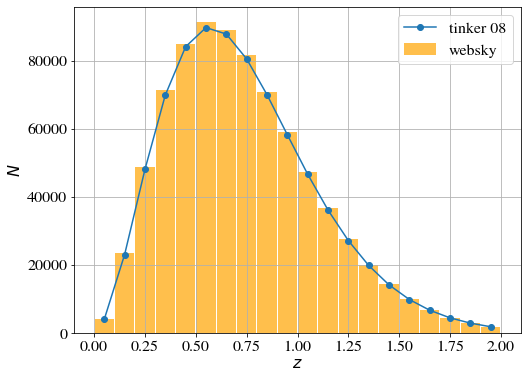

In [48]:
N_clusters_z, xedges = np.histogram(z, bins=z_edges)
# plt.errorbar(z_center,N_clusters_z,yerr=np.sqrt(N_clusters_z),marker='o',markersize=3.,ls='none',label='catalogue data',capsize=5,c='k')
#plt.hist(z_center,N_clusters_z_theory,marker='o',markersize=3.,ls=':',label='theory',c='orange')
n, bins, patches = plt.hist(x=np.repeat(z_center,
                                        N_clusters_z), 
                            bins=z_edges, 
                            color='orange',
                            alpha=0.7, 
                            rwidth=0.95,
                            label='websky')
plt.plot(z_center,nz,label='tinker 08',marker='o')
# n, bins, patches = plt.hist(x=np.repeat(z_center,
#                                         nz), 
#                             bins=z_edges, 
#                             color='orange',
#                             alpha=0.7, 
#                             rwidth=0.95,
#                             label='Tinker')

# n, bins, patches = plt.hist(x=np.repeat(z_center,N_clusters_z_theory), bins=z_edges, color='blue',alpha=0.7, rwidth=0.95,label=r'SO (~$10^{4}$) - class_sz')



plt.grid()
plt.legend(loc=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$N$')
plt.yscale('linear')
plt.show()

In [53]:
# range of integration of the reduced pressure profile:
x= np.logspace(-8,np.log10(4.),1000)
m200c_pivot = 1e14*M.h() # [Msun/h]

def E(zp):
    return M.Hubble(zp)/M.Hubble(0.)
vec_get_dy_classy_battaglia = np.vectorize(M.get_1e6xdy_from_battaglia_pressure_at_x_z_and_m200c)

def y_over_Ez2_over_mfid_battaglia_at_m_and_z_theta(m_over_m_pivot_200c,thetap,z):

    m200c = m_over_m_pivot_200c*m200c_pivot
    theta_over_theta_200c = thetap
    #r200c = M.get_r_delta_of_m_delta_at_z(200,m200c,z)

    
    pp_battaglia = []
    #for xx in x:
        #pp_gnfw.append(M.get_1e6xdy_from_gnfw_pressure_at_x_z_and_m500c(np.sqrt(xx**2+theta_over_theta_500**2),z,m))
    pp_battaglia = vec_get_dy_classy_battaglia(np.sqrt(x**2+theta_over_theta_200c**2),z,m200c)
    # factor 2: s = 0 to smax instead of -smax to smax in the los integration
    xmax = 4.*np.sqrt(1.-(theta_over_theta_200c/4.)**2.)
    norm_battaglia = 2.*np.trapz(pp_battaglia[x<xmax], x=x[x<xmax])/E(z)**2*1e-6/m_over_m_pivot_200c
    return norm_battaglia
vec_y_battaglia = np.vectorize(y_over_Ez2_over_mfid_battaglia_at_m_and_z_theta)

def x200c_to_theta_arcmin(X):
    return M.get_rad_to_arcmin(r200c*X/M.get_dA(z))
def theta_arcmin_to_x200c(X):
    theta_rad = M.get_arcmin_to_rad(X)
    r = M.get_dA(z)*theta_rad
    return r/r200c

In [64]:
n_th = 80
th_array = np.geomspace(0.01,8.,n_th) # this theta/theta200c
M200m_test=5e14*M.h() # [Msun/h] 
z_test=0.1
M200c_test = M.get_m200m_to_m200c_at_z_and_M(z_test,M200m_test)
print('z=%.5e m200m=%.5e Msun m200c=%.5e Msun'%(z_test,M200m_test/M.h(),M200c_test/M.h()))

# dimensonfull radial array:
r200c = M.get_r_delta_of_m_delta_at_z(200,M200c_test,z_test)
theta200c_rad = r200c/M.get_dA(z_test)
theta200c_arcmin = M.get_rad_to_arcmin(theta200c_rad)


z=1.00000e-01 m200m=5.00000e+14 Msun m200c=3.54448e+14 Msun


In [65]:
r200c

0.9797243231020754

/var/folders/_q/j04c9lw93j75_c_z2jdfbtwm0000gn/T/ipykernel_2557/242195892.py:21: RuntimeWarning: invalid value encountered in sqrt
  xmax = 4.*np.sqrt(1.-(theta_over_theta_200c/4.)**2.)


Text(0.5, 1.0, 'z=1.00000e-01 m200m=5.00000e+14 Msun m200c=3.54448e+14 Msun')

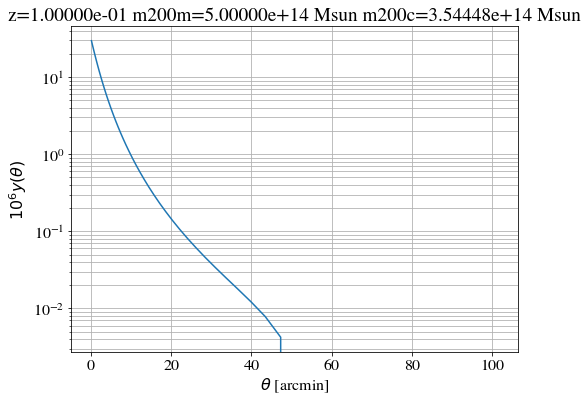

In [66]:
plt.plot(M.get_rad_to_arcmin(th_array*theta200c_rad),1e6*vec_y_battaglia(M200c_test/m200c_pivot,th_array,z_test)*E(z_test)**2*M200c_test/m200c_pivot)
plt.xlabel(r'$\theta$ [arcmin]')
plt.ylabel(r'$10^{6}y(\theta)$')
plt.grid(which='both')
plt.yscale('log')
plt.title('z=%.5e m200m=%.5e Msun m200c=%.5e Msun'%(z_test,M200m_test/M.h(),M200c_test/M.h()))

In [67]:
th_arcmin_to_print = M.get_rad_to_arcmin(th_array*theta200c_rad)
y_to_print = 1e6*vec_y_battaglia(M200c_test/m200c_pivot,th_array,z_test)*E(z_test)**2*M200c_test/m200c_pivot

/var/folders/_q/j04c9lw93j75_c_z2jdfbtwm0000gn/T/ipykernel_2557/242195892.py:21: RuntimeWarning: invalid value encountered in sqrt
  xmax = 4.*np.sqrt(1.-(theta_over_theta_200c/4.)**2.)


In [68]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_ymap/class_vs_websky_yprofile/for_marcelo_B12_thetaarcmin_1e6y_z1_m200m1e14_webskycosmo_t04r200c.txt',np.c_[th_arcmin_to_print,y_to_print])